# Ambiente

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Classes Utilizadas

In [ ]:
classes = ['text', 'insult', 'obscene', 'ideology', 'lgbtqphobia', 'racism', 'sexism', 'xenophobia']

# OlidBR

In [ ]:
olid = pd.read_csv("/content/drive/MyDrive/IC/data/processed/olid-br.csv")

In [ ]:
olid = olid.rename(columns={'profanity_obscene': 'obscene'})

In [ ]:
olid = olid.reindex(columns=classes, fill_value=0)

In [ ]:
olid = olid[olid.eq(1).any(axis=1)]

# ToldBR

In [ ]:
told = pd.read_csv("/content/drive/MyDrive/IC/data/processed/told-br_bin.csv")

In [ ]:
told = told.rename(columns={'homophobia': 'lgbtqphobia', 'misogyny':'sexism'})

In [ ]:
told = told.reindex(columns=classes, fill_value=0)

In [ ]:
told = told[told.eq(1).any(axis=1)]

# HateBR

In [ ]:
hate = pd.read_csv("/content/drive/MyDrive/IC/data/processed/hate-br.csv")

In [ ]:
hate = hate.rename(columns={'partyism': 'ideology', 'homophobia': 'lgbtqphobia'})

In [ ]:
hate = hate.reindex(columns=classes, fill_value=0)

In [ ]:
hate = hate[hate.eq(1).any(axis=1)]

# Concatenar

In [ ]:
df_final = pd.concat([olid, told, hate], ignore_index=True)

In [ ]:
df_final.drop_duplicates(subset=['text'], inplace=True)

In [ ]:
df_final.to_csv("/content/drive/MyDrive/IC/data/processed/unified-hate.csv", index=False)

# Análise

In [ ]:
df_final = pd.read_csv("/content/drive/MyDrive/IC/data/processed/unified-hate.csv")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
def plotar_distribuicao_classes(df):
    labels = df.columns[1:]
    valores = [df[label].sum() for label in labels]

    plt.figure(figsize=(7, 5))
    bars = plt.bar(labels, valores, color=['#004c6d', '#00678a', '#0083a6', '#00a1c1', '#00c0d8', '#00dfed', '#00ffff'])
    plt.title("Distribuição de Tweets por Classe")
    plt.ylabel("Número de Tweets")
    plt.grid(axis='y', linestyle=':', alpha=0.5)

    for bar in bars:
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
                str(int(bar.get_height())), ha='center', va='bottom',
                fontsize=10, color='black')

    plt.tight_layout()
    plt.legend(["Unified Hate"])
    plt.show()

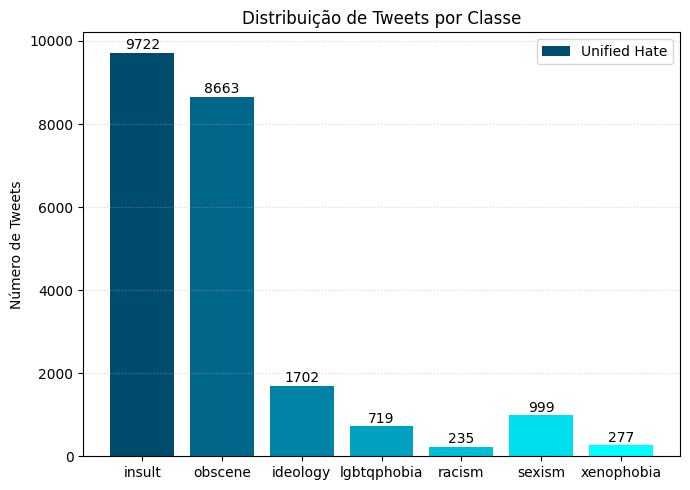

In [ ]:
plotar_distribuicao_classes(df_final)

In [ ]:
def plotar_comparacao_classes(df1, df2, df3, nomes_corpus):
    labels = df1.columns[1:]
    valores1 = [df1[label].sum() for label in labels]
    valores2 = [df2[label].sum() for label in labels]
    valores3 = [df3[label].sum() for label in labels]

    x = np.arange(len(labels))
    largura = 0.25

    plt.figure(figsize=(8, 5))
    bars1 = plt.bar(x - largura, valores1, width=largura, label=nomes_corpus[0], color='#004c6d')
    bars2 = plt.bar(x, valores2, width=largura, label=nomes_corpus[1], color='#00a1c1')
    bars3 = plt.bar(x + largura, valores3, width=largura, label=nomes_corpus[2], color='#00ffff')

    plt.title("Comparação da Distribuição de Tweets por Classe")
    plt.ylabel("Número de Tweets")
    plt.xticks(x, labels)
    plt.grid(axis='y', linestyle=':', alpha=0.5)
    plt.legend()

    for bars in [bars1, bars2, bars3]:
        for bar in bars:
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
                    str(int(bar.get_height())), ha='center', va='bottom',
                    fontsize=9, color='black')

    plt.tight_layout()
    plt.show()

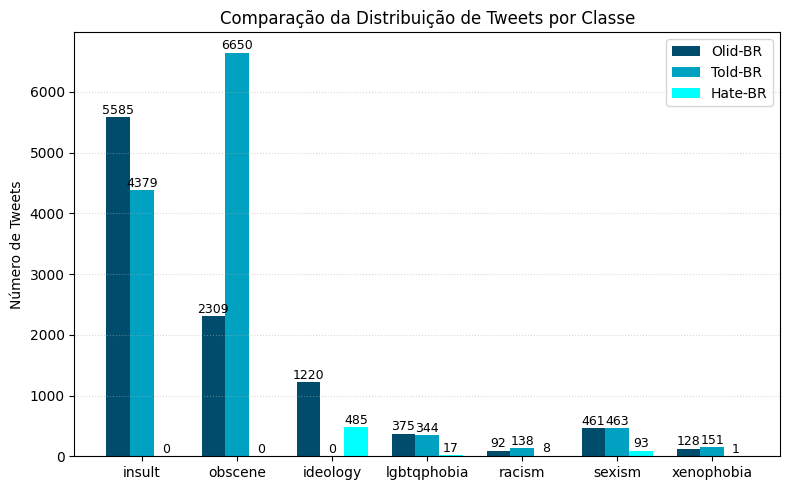

In [ ]:
plotar_comparacao_classes(olid, told, hate, ["Olid-BR", "Told-BR", "Hate-BR"])

In [ ]:
def plotar_distribuicao_palavras(df):
    df_melted = df.melt(id_vars=["text"],
                        value_vars=df.columns[1:],
                        var_name="classe", value_name="flag")


    df_melted = df_melted[df_melted["flag"] >= 1]
    df_melted["word_count"] = df_melted["text"].apply(lambda x: len(x.split()))

    plt.figure(figsize=(10, 6))
    sns.boxplot(x="classe", y="word_count", data=df_melted, hue="classe", palette=['#004c6d', '#00678a', '#0083a6', '#00a1c1', '#00c0d8', '#00dfed', '#00ffff'], legend=False)
    plt.grid(axis='y', linestyle=':', alpha=0.5)
    plt.xlabel("")
    plt.ylabel("Número de Palavras")
    plt.title("Distribuição de Palavras por Tweet em Cada Classe")
    plt.show()

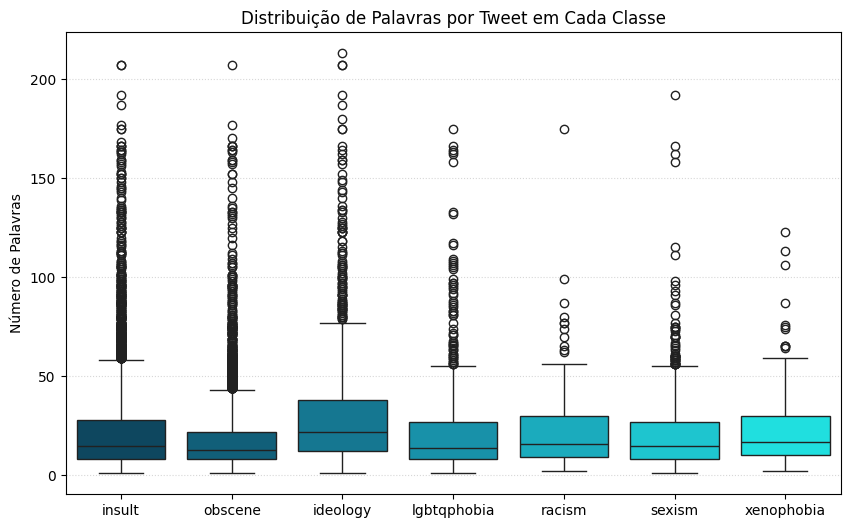

In [ ]:
plotar_distribuicao_palavras(df_final)